In [95]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [96]:
iris = load_iris()

In [97]:
# Наименования признаков
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [98]:
# Размер выборки
iris.data.shape, iris.target.shape

((150, 4), (150,))

In [99]:
# Сформируем DataFrame
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [100]:
# И выведем его статистические характеристики
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Разделим daraframe на тестовую и обучающую выборки

In [101]:
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(
    iris.data, iris.target, test_size=0.45, random_state=1)

In [102]:
# Размер обучающей выборки
iris_X_train.shape, iris_y_train.shape

((82, 4), (82,))

In [103]:
# Размер тестовой выборки
iris_X_test.shape, iris_y_test.shape

((68, 4), (68,))

# Обучение модели ближайших соседей для произвольно заданного гиперпараметра K

In [104]:
# 2 ближайших соседа
cl1_1 = KNeighborsClassifier(n_neighbors=2)
cl1_1.fit(iris_X_train, iris_y_train)
target1_1 = cl1_1.predict(iris_X_test)
len(target1_1), target1_1

(68,
 array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
        1, 0, 2, 1, 0, 0, 1, 1, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
        1, 2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 1, 1, 2, 1, 0, 2, 1, 0, 0, 2,
        0, 2]))

In [105]:
# 7 ближайших соседей
cl1_2 = KNeighborsClassifier(n_neighbors=7)
cl1_2.fit(iris_X_train, iris_y_train)
target1_2 = cl1_2.predict(iris_X_test)
len(target1_2), target1_2

(68,
 array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
        2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
        1, 2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 1, 1, 2, 1, 0, 2, 2, 0, 0, 2,
        0, 2]))

# Метрики качества классификации

# 1) Accuracy

In [106]:
# iris_y_test - эталонное значение классов из исходной (тестовой) выборки
# target* - предсказанное значение классов

# 2 ближайших соседа
accuracy_score(iris_y_test, target1_1)

0.9411764705882353

In [107]:
# 7 ближайших соседей
accuracy_score(iris_y_test, target1_2)

0.9558823529411765

In [108]:
def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [109]:
# 2 ближайших соседа
print_accuracy_score_for_classes(iris_y_test, target1_1)

Метка 	 Accuracy
0 	 1.0
1 	 1.0
2 	 0.8333333333333334


In [110]:
# 7 ближайших соседей
print_accuracy_score_for_classes(iris_y_test, target1_2)

Метка 	 Accuracy
0 	 1.0
1 	 0.9523809523809523
2 	 0.9166666666666666


# 2) Матрица ошибок или Confusion Matrix

In [111]:
# Конвертация целевого признака в бинарный
def convert_target_to_binary(array:np.ndarray, target:int) -> np.ndarray:
    # Если целевой признак совпадает с указанным, то 1 иначе 0
    res = [1 if x==target else 0 for x in array]
    return res

In [112]:
# Если целевой признак ==2, 
# то будем считать этот случай 1 в бинарном признаке
bin_iris_y_test = convert_target_to_binary(iris_y_test, 2)
# Конвертация предсказанных признаков
bin_target1_1 = convert_target_to_binary(target1_1, 2)
bin_target1_2 = convert_target_to_binary(target1_2, 2)
confusion_matrix(bin_iris_y_test, bin_target1_1, labels=[0, 1])

array([[44,  0],
       [ 4, 20]], dtype=int64)

In [113]:
tn, fp, fn, tp = confusion_matrix(bin_iris_y_test, bin_target1_1).ravel()
tn, fp, fn, tp

(44, 0, 4, 20)

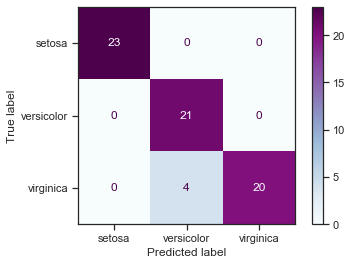

In [114]:
plot_confusion_matrix(cl1_1, iris_X_test, iris_y_test, 
                      display_labels=iris.target_names, cmap=plt.cm.BuPu)

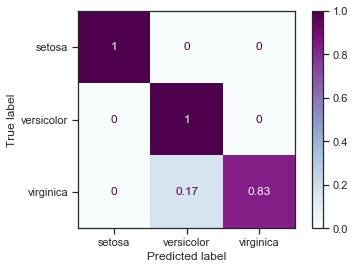

In [115]:
plot_confusion_matrix(cl1_1, iris_X_test, iris_y_test, 
                      display_labels=iris.target_names, 
                      cmap=plt.cm.BuPu, normalize='true')

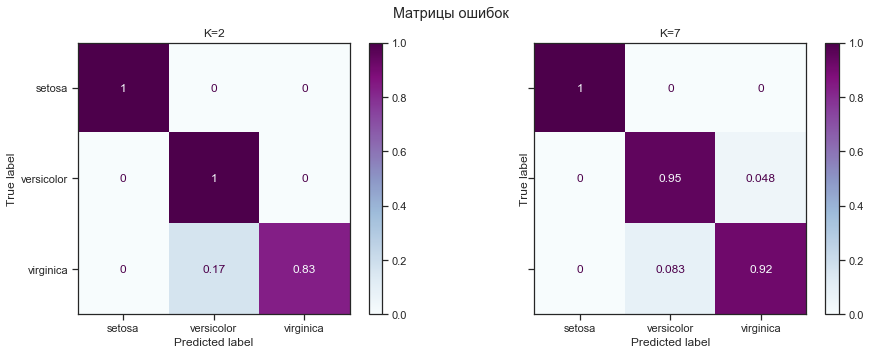

In [116]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,5))

plot_confusion_matrix(cl1_1, iris_X_test, iris_y_test, 
                      display_labels=iris.target_names, 
                      cmap=plt.cm.BuPu, normalize='true', ax=ax[0])

plot_confusion_matrix(cl1_2, iris_X_test, iris_y_test, 
                      display_labels=iris.target_names, 
                      cmap=plt.cm.BuPu, normalize='true', ax=ax[1])

fig.suptitle('Матрицы ошибок')
ax[0].title.set_text('K=2')
ax[1].title.set_text('K=7')

# 3) Precision, recall и F-мера

In [117]:
# Для 2 ближайших соседей
precision_score(bin_iris_y_test, bin_target1_1), recall_score(bin_iris_y_test, bin_target1_1)

(1.0, 0.8333333333333334)

In [118]:
# Для 7 ближайших соседей
precision_score(bin_iris_y_test, bin_target1_2), recall_score(bin_iris_y_test, bin_target1_2)

(0.9565217391304348, 0.9166666666666666)

In [119]:
# Параметры TP, TN, FP, FN считаются как сумма по всем классам
precision_score(iris_y_test, target1_1, average='micro')

0.9411764705882353

In [120]:
# Параметры TP, TN, FP, FN считаются отдельно для каждого класса 
# и берется среднее значение, дисбаланс классов не учитывается.
precision_score(iris_y_test, target1_1, average='macro')

0.9466666666666667

In [121]:
# Параметры TP, TN, FP, FN считаются отдельно для каждого класса 
# и берется средневзвешенное значение, дисбаланс классов учитывается 
# в виде веса классов (вес - количество истинных значений каждого класса).
precision_score(iris_y_test, target1_1, average='weighted')

0.9505882352941176

In [122]:
# f-мера

In [123]:
f1_score(bin_iris_y_test, bin_target1_2)

0.9361702127659574

In [124]:
f1_score(iris_y_test, target1_1, average='micro')

0.9411764705882353

In [125]:
f1_score(iris_y_test, target1_1, average='macro')

0.9407114624505929

In [126]:
f1_score(iris_y_test, target1_1, average='weighted')

0.9410602185538247

In [127]:
classification_report(iris_y_test, target1_1, 
                      target_names=iris.target_names, output_dict=True)

{'setosa': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 23},
 'versicolor': {'precision': 0.84,
  'recall': 1.0,
  'f1-score': 0.9130434782608696,
  'support': 21},
 'virginica': {'precision': 1.0,
  'recall': 0.8333333333333334,
  'f1-score': 0.9090909090909091,
  'support': 24},
 'accuracy': 0.9411764705882353,
 'macro avg': {'precision': 0.9466666666666667,
  'recall': 0.9444444444444445,
  'f1-score': 0.9407114624505929,
  'support': 68},
 'weighted avg': {'precision': 0.9505882352941176,
  'recall': 0.9411764705882353,
  'f1-score': 0.9410602185538247,
  'support': 68}}

# 4) ROC-кривая и ROC AUC

In [128]:
fpr, tpr, thresholds = roc_curve(bin_iris_y_test, bin_target1_1, 
                                 pos_label=1)
fpr, tpr, thresholds

(array([0., 0., 1.]),
 array([0.        , 0.83333333, 1.        ]),
 array([2, 1, 0]))

In [129]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, pos_label, average):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

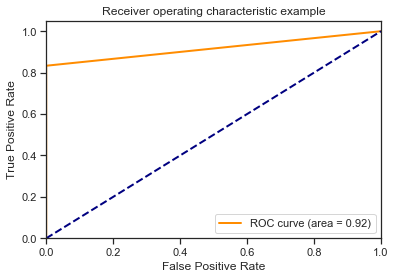

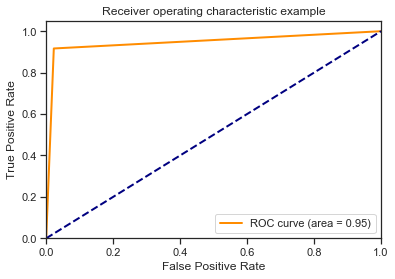

In [130]:
# Для 2 ближайших соседей
draw_roc_curve(bin_iris_y_test, bin_target1_1, pos_label=1, average='micro')
# Для 7 ближайших соседей
draw_roc_curve(bin_iris_y_test, bin_target1_2, pos_label=1, average='micro')

Проанализировав результаты полученных метрик качества классификации, можно судить о среднем качестве классификации.

# Построение модели с использованием кросс-валидации

In [131]:
iris_cross = cross_val_score(KNeighborsClassifier(n_neighbors=2), 
                         iris.data, iris.target, cv=5)
iris_cross

array([0.96666667, 0.93333333, 0.93333333, 0.9       , 1.        ])

In [132]:
np.mean(iris_cross)

0.9466666666666665

In [133]:
scoring = {'precision': 'precision_weighted', 
           'recall': 'recall_weighted',
           'f1': 'f1_weighted'}

iris_cross = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                        iris.data, iris.target, scoring=scoring, 
                        cv=5, return_train_score=True)
iris_cross

{'fit_time': array([0.00100017, 0.        , 0.00099993, 0.        , 0.        ]),
 'score_time': array([0.00500011, 0.00500035, 0.00400019, 0.00500035, 0.00400043]),
 'test_precision': array([0.96969697, 0.94444444, 0.94444444, 0.9023569 , 1.        ]),
 'train_precision': array([0.97674419, 0.98412698, 0.97674419, 0.98412698, 0.97674419]),
 'test_recall': array([0.96666667, 0.93333333, 0.93333333, 0.9       , 1.        ]),
 'train_recall': array([0.975     , 0.98333333, 0.975     , 0.98333333, 0.975     ]),
 'test_f1': array([0.96658312, 0.93265993, 0.93265993, 0.89974937, 1.        ]),
 'train_f1': array([0.97496479, 0.98332291, 0.97496479, 0.98332291, 0.97496479])}

# Нахождение наилучшего гиперпараметра K с использованием GridSearchCV и кросс-валидации

In [134]:
n_range = np.array(range(5,40,3))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5,  8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38])}]

In [135]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_gs.fit(iris_X_train, iris_y_train)

Wall time: 135 ms


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': array([ 5,  8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [136]:
clf_gs.cv_results_

{'mean_fit_time': array([0.0006001 , 0.00039997, 0.00040007, 0.00040002, 0.00039997,
        0.00040002, 0.00040007, 0.00020003, 0.00060005, 0.0006    ,
        0.        , 0.        ]),
 'std_fit_time': array([0.00048998, 0.00048986, 0.00048998, 0.00048992, 0.00048986,
        0.00048992, 0.00048998, 0.00040007, 0.00048994, 0.0004899 ,
        0.        , 0.        ]),
 'mean_score_time': array([0.00139999, 0.00140009, 0.00139999, 0.00160012, 0.00140014,
        0.00160012, 0.00139999, 0.00160007, 0.00140004, 0.00140014,
        0.00099998, 0.00200009]),
 'std_score_time': array([4.89881921e-04, 4.89901406e-04, 4.89979242e-04, 4.89959789e-04,
        4.89862464e-04, 4.89959789e-04, 4.89979242e-04, 4.90018183e-04,
        4.89940316e-04, 4.89862464e-04, 9.53674316e-08, 1.50789149e-07]),
 'param_n_neighbors': masked_array(data=[5, 8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, Fals

In [137]:
# Лучшая модель
clf_gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [138]:
# Лучшее значение метрики
clf_gs.best_score_

0.9632352941176471

In [139]:
# Лучшее значение параметров
clf_gs.best_params_

{'n_neighbors': 8}

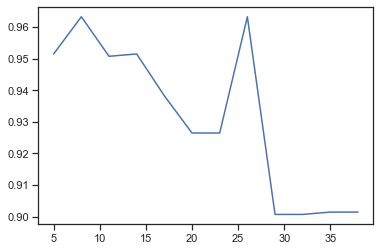

In [140]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

Таким образом, лучшее найденное значение гиперпараметра = 8. При этом гиперпараметре получено наилучшее значение метрики = 0.963